In [9]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [10]:
def current_time():
    time = datetime.now()
    return time.strftime("%H:%M:%S")

In [14]:
# Bands from 10m
band8 = 'data_20m/bands/T42TXK_20200913T060641_B8A_20m.jp2'
band11 = 'data_20m/bands/T42TXK_20200913T060641_B11_20m.jp2'

In [15]:
# Opening bands with gdal
band8 = gdal.Open(band8)
band11 = gdal.Open(band11)

In [16]:
# Reading band
print('Reading start:', current_time())
nir = band8.ReadAsArray(buf_type=gdal.GDT_Float32)
swir = band11.ReadAsArray(buf_type=gdal.GDT_Float32)
print('Reading end:', current_time())

Reading start: 19:36:17
Reading end: 19:36:20


In [20]:
# Create calculating function
def cal_mois_ind(nir, swir):
    ndmi = np.where(nir + swir == 0., 0.,
                   (nir - swir) / (nir + swir))
    return ndmi

# Create ploting function
def plot_once(data, title, cmp=None):
    fig, ax = plt.subplots(1, 1, figsize=(12, 5))
    ax.imshow(data, cmap=cmp)
    ax.axis('off')
    ax.set_title(title)

In [21]:
print('Calculating start:', current_time())
ndmi = cal_mois_ind(nir=nir, swir=swir)
print('Calculating end:', current_time())

Calculating start: 19:41:07
Calculating end: 19:41:07


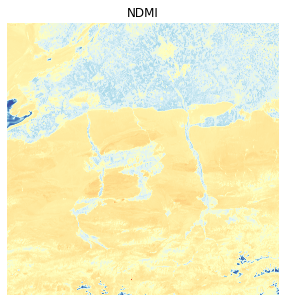

In [23]:
plot_once(data=ndmi, title='NDMI', cmp='RdYlBu')

In [24]:
# Create saving function
def save_raster(set_data, cr_data, outpath):
    rasterset = gdal.GetDriverByName('GTiff').Create(
        outpath, cr_data.RasterXSize, cr_data.RasterYSize,
        1, gdal.GDT_Float32)
    rasterset.SetProjection(cr_data.GetProjection())
    rasterset.SetGeoTransform(cr_data.GetGeoTransform())
    rasterset.GetRasterBand(1).WriteArray(set_data)
    rasterset.GetRasterBand(1).SetNoDataValue(-999)
    rasterset = None

In [25]:
ndmi_outpath = 'data_20m/layers/NDMI.tiff'

In [27]:
print('Saving start:', current_time())
save_raster(ndmi, band8, ndmi_outpath)
print('Saving end:', current_time())

Saving start: 19:44:34
Saving end: 19:44:34
